## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

In [97]:
import pandas as pd
import seaborn as sns

## a) 
Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [98]:
df = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", match = "1900", decimal = ",", thousands = "\xa0")[2]

---
## b) 
Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

In [99]:
df.head()

,Unnamed: 0,Medel- folkmängd,Födda,Döda,Naturlig befolkningsförändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
0,1900,5 117 000,138 139,86 146,51 993,27.0,16.8,10.2,4.02
1,1901,5 156 000,139 370,82 772,56 598,27.0,16.1,11.0,4.04
2,1902,5 187 000,137 364,79 722,57 642,26.5,15.4,11.1,3.95
3,1903,5 210 000,133 896,78 610,55 286,25.7,15.1,10.6,3.82
4,1904,5 241 000,134 952,80 152,54 800,25.7,15.3,10.5,3.83


In [100]:
df.rename(columns = {"Unnamed: 0": "År", "Medel- folkmängd": "Medelfolkmängd"}, inplace = True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   År                                         122 non-null    int64  
 1   Medelfolkmängd                             122 non-null    object 
 2   Födda                                      122 non-null    object 
 3   Döda                                       122 non-null    object 
 4   Naturlig befolkningsförändring             122 non-null    object 
 5   Nativitet (per 1000)                       122 non-null    float64
 6   Dödstal (per 1000)                         122 non-null    float64
 7   Naturlig befolkningsförändring (per 1000)  122 non-null    float64
 8   Total fertilitet                           121 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 8.7+ KB


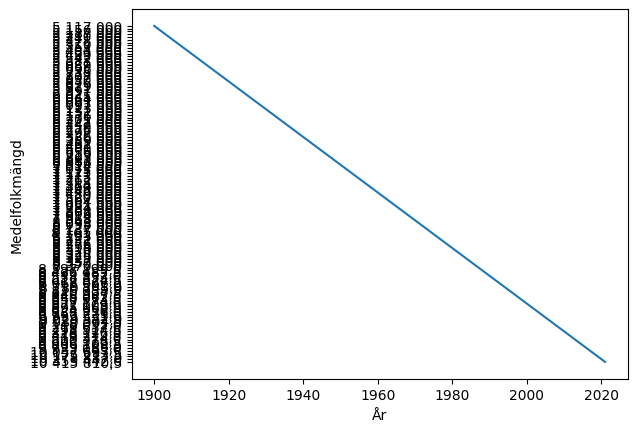

In [102]:
sns.lineplot(df, x = "År", y = "Medelfolkmängd");

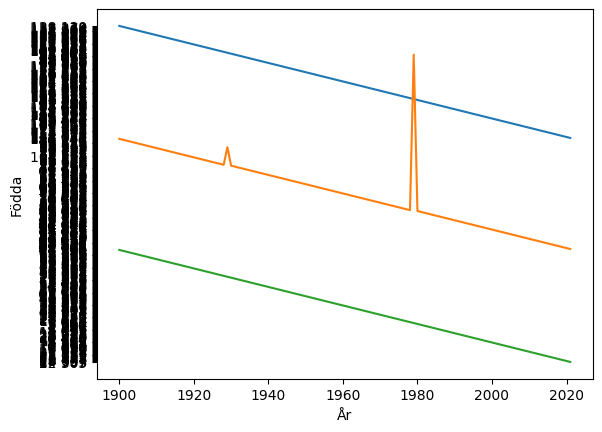

In [103]:
sns.lineplot(df, x = "År", y = "Födda")
sns.lineplot(df, x = "År", y = "Döda")
sns.lineplot(df, x = "År", y = "Naturlig befolkningsförändring");

---
## c) 
Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |

In [104]:
df2 = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", match = "utgången")[0]

In [105]:
df2 = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", match = "utgången", decimal = ",", thousands = " ", header = 1, skiprows = [9, 10, 11, 12])[0]

In [106]:
print(df2["Folkmängd"][0])

print("asd\nasd")

900 000
asd
asd


In [107]:
import pandas as pd # why does "\xa0" work and not raw string r"\xa0" or "\\xa0"? is \xa0 here not a string but instead something else that gets converted into a string?
df2 = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", match = "utgången", decimal = ",", thousands = "\xa0", header = 1, skiprows = [9, 10, 11, 12])[0]
df2

,Vid utgången av år,Folkmängd,Totalt,Promille
0,1570,900000,—,—
1,1650,1225000,4063,3.86
2,1700,1485000,5200,3.86
3,1720,1350000,−6 750,"−4,75"
4,1755,1878000,15086,9.48
5,1815,2465000,9783,4.54
6,1865,4099000,32680,10.22


In [108]:
df2

,Vid utgången av år,Folkmängd,Totalt,Promille
0,1570,900000,—,—
1,1650,1225000,4063,3.86
2,1700,1485000,5200,3.86
3,1720,1350000,−6 750,"−4,75"
4,1755,1878000,15086,9.48
5,1815,2465000,9783,4.54
6,1865,4099000,32680,10.22


In [109]:
df2.drop(["Totalt", "Promille"], axis = "columns", inplace = True)
df2

,Vid utgången av år,Folkmängd
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000


In [110]:
df2.rename(columns = {"Vid utgången av år": "År"}, inplace = True)
df2

,År,Folkmängd
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000


In [111]:
# df2 = df2.set_index(["År"])
# df2 # set index to year?

In [112]:
df2.info() # folkmängd is not numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   År         7 non-null      int64
 1   Folkmängd  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [113]:
df2["Folkmängd"][0] # looks like this

900000

In [114]:
# df2['Folkmängd'] = df2['Folkmängd'].apply(lambda x: int(x.replace(u'\xa0', u'')))
# df2["Folkmängd"][0] # converted to ints

In [115]:
# df2["Folkmängd"] = df2["Folkmängd"].apply(int, base=16)

#df2["Folkmängd"][0].replace(u"\xa0", "").astype(int)

In [116]:
# df2["Folkmängd"] = df2["Folkmängd"].replace(r"\xa0", "")
# df2["Folkmängd"][0]

In [117]:
# df2["Folkmängd"].apply(lambda x: int(x, 6))
# df2["Folkmängd"][0]

In [118]:
# df2["Folkmängd"].apply(int, base=16)
# df2["Folkmängd"][0]

---
## d) 
Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

---
## e) 
Draw a graph of population data from 1570-2020.

---
## f) 
Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

---
## g) 
Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

---
## h)
Feel free to find other interesting facts about the Swedish demographics based on this data. 